## Information Retrieval final project
#### Selected project: P7
##### How do you feel, my dear?

We will start by loading the dataset, Emotion Detection from Text (Kaggle), on a pandas dataframe and having a first look at it

In [1]:
import pandas as pd

df = pd.read_csv('data/tweet_emotions.csv', delimiter=',')
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


We can discard the tweet_id column, since it won't be necessary for our analysis.

We have 40,000 tweets labeled with its sentiment. Let's now count how many different sentiments are there on the dataset and how many tweets are labeled for each sentiment

In [3]:
df.drop('tweet_id', axis = 1, inplace = True)
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

Let's draw a couple plot to have a better idea of our data. We have left out the 3 sentiments with the lowest counts in the pie chart, so that it is more readable

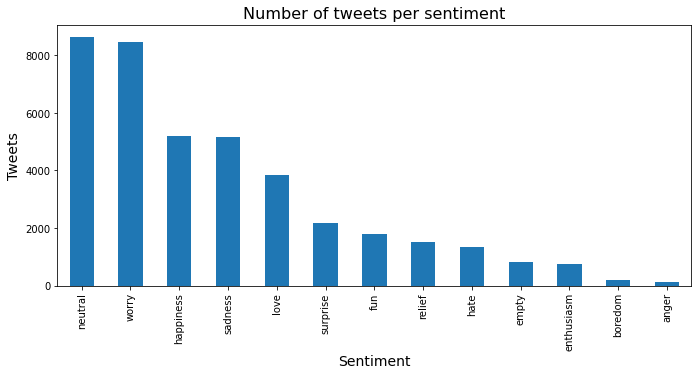

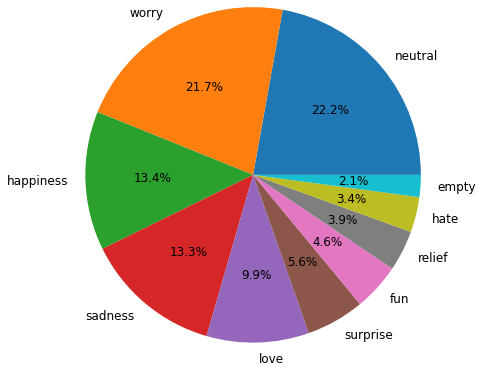

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.5)
plt.subplot(2, 2 , 1)
df.sentiment.value_counts().plot.bar().set_title('Number of tweets per sentiment')
plt.title('Number of tweets per sentiment', fontsize=16)
plt.ylabel('Tweets', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)

plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.8)
plt.subplot(2, 2 , 2)
df.sentiment.value_counts()[:10].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 12})
plt.ylabel('')

plt.show()

In order to build our model with this dataset, we should balance the data so that we have a not so different amount of values for each class. Because of being limited by my machine, I won't be able to do so. Let's have a closer look at our dataset

In [5]:
df.head()

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df.isnull().values.any()

False

Since it seems alright, let's split the dataset in independent and dependent variables

In [7]:
X = df.content
y = df.sentiment

In order to create the model from the data, we will have to transform the categorical data into numerical. First, we will encode each sentiment:

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

As I am really limited by my machine's memory, we will have to split first the dataset into train and test, so that we can later vectorize the text from the tweets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

After testing out both CountVectorizer and TfidfVectorizer, we will continue with Tfidf, since it provides better results for our task. The vectorizer will perform the operations of cleaning, tokenizing, and removing stop words from our text for us

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(analyzer = 'word', stop_words = 'english', max_features = 5000)

In [11]:
X_train = tv.fit_transform(X_train).toarray()
X_test = tv.transform(X_test).toarray()

We will use LinearSVC as our classifier, since it has providede the highest accuracy amongst all tested classifiers for multiclass classification

In [12]:
from sklearn.svm import LinearSVC

model = LinearSVC(random_state = 42, max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [13]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df['sentiment'].unique()))

              precision    recall  f1-score   support

       empty       0.00      0.00      0.00        34
     sadness       0.15      0.04      0.06        50
  enthusiasm       0.08      0.02      0.03       252
     neutral       0.05      0.01      0.01       235
       worry       0.13      0.06      0.08       515
    surprise       0.30      0.34      0.32      1557
        love       0.29      0.21      0.24       393
         fun       0.39      0.36      0.37      1179
        hate       0.33      0.46      0.38      2542
   happiness       0.14      0.06      0.09       441
     boredom       0.29      0.24      0.26      1577
      relief       0.12      0.06      0.08       632
       anger       0.34      0.40      0.37      2593

    accuracy                           0.31     12000
   macro avg       0.20      0.17      0.18     12000
weighted avg       0.29      0.31      0.29     12000



The accuracy isn't great, probably because of our dataset. However, let's make some predictions

In [14]:
test = "I would like to smash this computer right now"
test_pred = model.predict(tv.transform([test]).toarray())

print(test)
print("Predicted emotion: ", label_encoder.inverse_transform(test_pred)[0])

I would like to smash this computer right now
Predicted emotion:  sadness


In [15]:
test = "Summer is almost here, I can't wait!"
test_pred = model.predict(tv.transform([test]).toarray())

print(test)
print("Predicted emotion: ", label_encoder.inverse_transform(test_pred)[0])

Summer is almost here, I can't wait!
Predicted emotion:  happiness


Now that we have our model ready, it's time to predict the emotions from a movie character.
Let's first load our dataset: Cornell Movie Dialogs Corpus

In [16]:
from pathlib import Path

corpus_location = 'C:/Users/Jesus/Desktop/Yisus/UNIMI/Information Retrieval/FINAL PROJECT/data/cornell movie-dialogs corpus/movie_lines.txt'
corpus = Path(corpus_location)

def print_lines(filename, n = 5):
    with open(filename, 'rb') as f:
        lines = f.readlines()
        for line in lines[:n]:
            print(line)
        
print_lines(corpus)

b'L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!\n'
b'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!\n'
b'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.\n'
b'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?\n'
b"L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.\n"


Let's define a couple methods to read the lines correctly, according to the documentation of the dataset, and store them in a datafame

In [17]:
def load_lines(file):
    lines = {}
    with open(file, 'r', encoding='iso-8859-1') as f:
        for i, line in enumerate(f):
            line_info = []
            list_field = line.split(' +++$+++ ')
            for field in list_field:
                line_info.append(field)
            lines[i] = line_info
    return lines

In [18]:
lines = load_lines(corpus)

In [19]:
lines_df = pd.DataFrame.from_dict(lines, orient='index', columns = ['line_id','character_id','movie_id','character_name','line'])

First look at our lines dataframe

In [20]:
lines_df.head()

,line_id,character_id,movie_id,character_name,line
0,L1045,u0,m0,BIANCA,They do not!\n
1,L1044,u2,m0,CAMERON,They do to!\n
2,L985,u0,m0,BIANCA,I hope so.\n
3,L984,u2,m0,CAMERON,She okay?\n
4,L925,u0,m0,BIANCA,Let's go.\n


In [21]:
lines_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304713 entries, 0 to 304712
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   line_id         304713 non-null  object
 1   character_id    304713 non-null  object
 2   movie_id        304713 non-null  object
 3   character_name  304713 non-null  object
 4   line            304713 non-null  object
dtypes: object(5)
memory usage: 13.9+ MB


Now we have got 304,713 different lines stored in a dataframe. Let's for example select the movie Fight Club, which has the movie id number 348

In [22]:
fc_lines = lines_df.loc[lines_df['movie_id'] == 'm348']
fc_lines.head()

,line_id,character_id,movie_id,character_name,line
181144,L213163,u5256,m348,ANGEL FACE,He was killed serving Project Mayhem.\n
181145,L213162,u5262,m348,JACK,No! Look at you! You're... you're running ar...
181146,L213161,u5256,m348,ANGEL FACE,He was killed in action.\n
181147,L213160,u5262,m348,JACK,Get your hands off him! Get off...! What the ...
181148,L213158,u5256,m348,ANGEL FACE,"The garden. Take him there. Move, people. L..."


We will analyze the emotions of the 3 main characters: Tyler, Marla and Jack. We will transform their lines to vectors, and then make predicitons with our trained classifier. We will start off with Tyler

In [23]:
tyler_lines = fc_lines['line'].loc[fc_lines['character_name'] == 'TYLER']

In [24]:
tyler_lines

181472                                              What?\n
181474                                              What?\n
181476                                              What?\n
181479            Why are you going with this, Ikea- boy?\n
181481    Why do you want to do that? Why do you want to...
                                ...                        
181914                 "Stuff."  Were the mid-terms hard?\n
181917    Your mom and dad will have to call kindly doct...
181919                  Is this a picture of Mom and Dad?\n
181920    They give basement apartments letters instead ...
181922    Raymond K. Hessel. 1320 SE Benning, apartment ...
Name: line, Length: 214, dtype: object

In [25]:
tyler_lines = tv.transform(tyler_lines).toarray()

In [26]:
tyler_emotion_codes = model.predict(tyler_lines)
tyler_emotions = label_encoder.inverse_transform(tyler_emotion_codes)

In [27]:
tyler_df = pd.DataFrame(tyler_emotions, columns=['sentiment'])

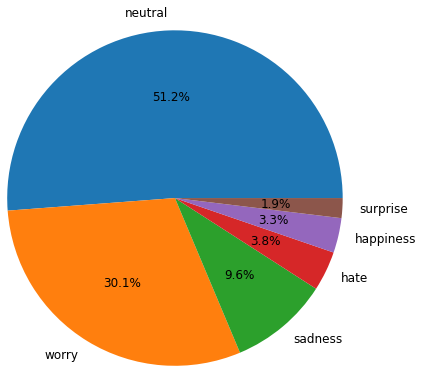

In [28]:
plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.8)
plt.subplot(2, 2 , 2)
tyler_df.sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 12})
plt.ylabel('')

plt.show()

Now we will do the same but for Marla

In [29]:
marla_lines = fc_lines['line'].loc[fc_lines['character_name'] == 'MARLA']
marla_lines.head()

181236                               Who did this to you?\n
181238                             My God, you're shot...\n
181240                                 What happened... ?\n
181242    I'm not paying this back.  I consider it "assh...
181244                            Why are you doing this?\n
Name: line, dtype: object

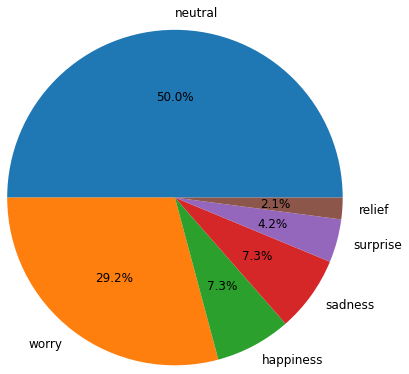

In [30]:
marla_lines = tv.transform(marla_lines).toarray()

marla_emotion_codes = model.predict(marla_lines)
marla_emotions = label_encoder.inverse_transform(marla_emotion_codes)

marla_df = pd.DataFrame(marla_emotions, columns=['sentiment'])

plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.8)
plt.subplot(2, 2 , 2)
marla_df.sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 12})
plt.ylabel('')

plt.show()

Lastly, Jack

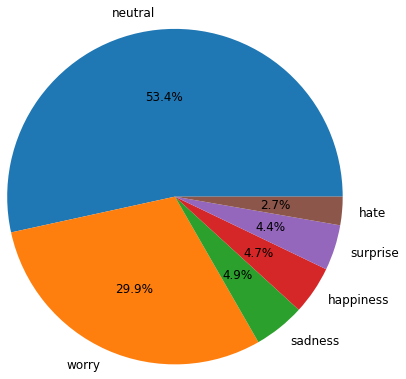

In [31]:
jack_lines = fc_lines['line'].loc[fc_lines['character_name'] == 'JACK']

jack_lines = tv.transform(jack_lines).toarray()

jack_emotion_codes = model.predict(jack_lines)
jack_emotions = label_encoder.inverse_transform(jack_emotion_codes)

jack_df = pd.DataFrame(jack_emotions, columns=['sentiment'])

plt.figure(figsize=(25, 12)).subplots_adjust(hspace = 0.8)
plt.subplot(2, 2 , 2)
jack_df.sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 12})
plt.ylabel('')

plt.show()

Now let's study the evolution of the characters during the film. We will divide the film in 3 parts, and see their emotionnal profile for each part. Same as before, we will first check Tyler's profile

In [32]:
len(tyler_lines)

214

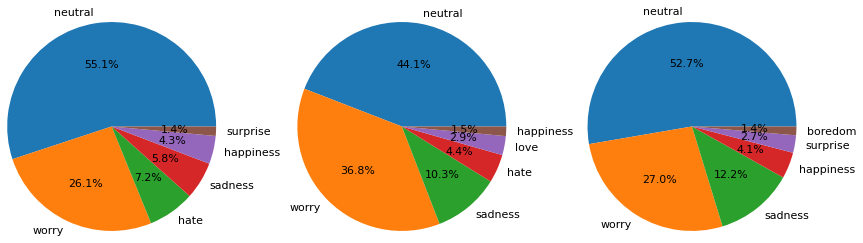

In [33]:
plt.figure(figsize=(13, 16)).subplots_adjust(wspace = 1)

plt.subplot(1, 3 , 1)
tyler_df.iloc[:70].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 2)
tyler_df.iloc[70:140].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 3)
tyler_df.iloc[140:].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=1.8, textprops={'fontsize': 11})
plt.ylabel('')

plt.show()

Let's see the evolution of Marla across the film

In [34]:
len(marla_lines)

97

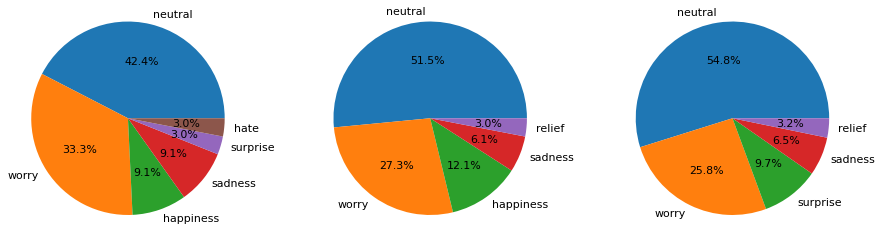

In [35]:
plt.figure(figsize=(13, 16)).subplots_adjust(wspace = 1.5)

plt.subplot(1, 3 , 1)
marla_df.iloc[:33].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 2)
marla_df.iloc[33:66].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 3)
marla_df.iloc[66:].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.show()

Lastly, let's see the evolution of Jack

In [36]:
len(jack_lines)

374

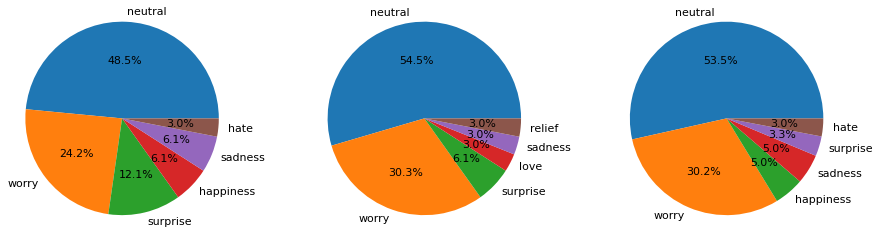

In [37]:
plt.figure(figsize=(13, 16)).subplots_adjust(wspace = 1.5)

plt.subplot(1, 3 , 1)
jack_df.iloc[:33].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 2)
jack_df.iloc[33:66].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.subplot(1, 3 , 3)
jack_df.iloc[66:].sentiment.value_counts()[:6].plot.pie(autopct='%1.1f%%', radius=2, textprops={'fontsize': 11})
plt.ylabel('')

plt.show()